# 逻辑回归和线性回归的区别和联系

直观：逻辑回归就是线性回归的损失函数加个sigmoid函数，两者属于广义线性模型家族。

1.要解决的问题：

逻辑回归解决的是分类问题，在空间找出决策平面区分不同类别；由于逻辑回归的输出介入0-1之间的概率值，离群点对决策平面影响不大。

线性回归解决的是回归问题，拟合数据；不适合用于分类数据，离群点对决策平面影响很大。

2.前提条件

线性回归要求变量服从正态分布，自变量和因变量有线性关系，逻辑回归假设数据服从伯努利分布。

3.模型比较：

损失函数：

线性回归$L=\frac{1}{2}\sum^m_{i=1}(y^i-\widehat{y})^2$=$\frac{1}{2}\sum^m_{i=1}(y^i- x_i  w_i)^2$，$h_\theta(x)=\theta^Tx$

逻辑回归$L=-\frac{1}{m}\sum^m_{i=1}[y^ilogh_{\theta}(x^{(i)})+(1-y^i)log(1-h_{\theta}(x^{(i)}))]$，$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$

说明：m表示样本数量，$h_\theta(x)$表示模型预测值，y表示期望值

优化方法：都是用梯度下降法或其他方法

4.因变量

逻辑回归的输出介入0-1之间的概率值，因变量分类型变量如{1，-1}有限的值，设定阈值，y值大于阈值是一类，y值小于阈值是另外一类。

线性回归输出介入$(-\infty,\infty)$，因变量连续。

# 逻辑回归的原理

## 构建模型

逻辑回归的目的是把线性回归的结果通过sigmoid函数，映射到$(0,1)$。

sigmoid函数：$g_k=\frac{1}{1+e^{-k}}$

线性回归的决策函数：$k=\theta^Tx$

逻辑回归的决策函数：$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$

$P(y=1\mid x;\theta)=h_\theta(x)$#输入x,模型参数为$\theta$情况下，输出结果为1的概率

$P(y=0\mid x;\theta)=1-h_\theta(x)$#输入x,模型参数为$\theta$情况下，输出结果为0的概率

## 损失函数 

从上式可以得到以下结果：

$\widehat{y}=h_\theta(x)$表示模型预测值

当$y=1$时，$P(y\mid x;\theta)=h_\theta(x)$；

当$y=0$时，$P(y\mid x;\theta)=1-h_\theta(x)$；

规整以下：$P(y\mid x;\theta)=(h_\theta(x))^y(1-h_\theta(x))^{1-y}$,这是对但单一个体而言，扩展到整个样本

似然函数：$L(\theta)=\prod^{m}_{i=1}P(y^{i}\mid x^{i};\theta)=\prod^{m}_{i=1}[(h_\theta(x^{i}))^{y^{i}}(1-h_\theta(x^{i}))^{1-y^{i}}]$

对数似然函数：$logL(\theta)=log\prod^{m}_{i=1}P(y^{i}\mid x^{i};\theta)=log\prod^{m}_{i=1}[(h_\theta(x^{i}))^{y^{i}}(1-h_\theta(x^{i}))^{1-y^{i}}]$

说明：这里发现有2m个式子相乘，利用log结果是2m项相加

$logL(\theta)=\sum^{m}_{i=1}[y^{i}log(h_\theta(x^{i}))+(1-y^{i})log(1-h_\theta(x^{i}))]$

目标是求$max_{\theta} logL$,即求$min_{\theta}-\frac{1}{m}logL$

最终损失函数为$J(\theta)=-\frac{1}{m}logL=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}log(h_\theta(x^{i}))+(1-y^{i})log(1-h_\theta(x^{i}))]$

## 优化模型

确定一些函数性质：

sigmoid函数：$g_k=\frac{1}{1+e^{-k}}$，$(g_k)'=g(k)g(1-k)k'$,

逻辑回归的决策函数：$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}=g(\theta^Tx)$

log函数：$logx=\frac{1}{x}$

使用梯度下降法：$\frac{\partial J(\theta_i)}{\partial \theta}$

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}\frac{1}{(h_\theta(x^{i}))}\frac{\partial h_\theta(x^{i})}{\partial \theta_i}-(1-y^{i})\frac{1}{1-h_\theta(x^{i})}\frac{\partial h_\theta(x^{i})}{\partial \theta_i}]$

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}\frac{1}{(h_\theta(x^{i}))}-(1-y^{i})\frac{1}{1-h_\theta(x^{i})}]\frac{\partial h_\theta(x^{i})}{\partial \theta_i}$

根据上面将$k=\theta^Tx$，快速得出

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}\frac{1}{(g(\theta^Tx_i))}-(1-y^{i})\frac{1}{1-g(\theta^Tx_i)})g(\theta^Tx_i)(1-g(\theta^Tx_i)][\frac{\partial \theta^Tx_i)}{\partial \theta_i}]$

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}(1-g(\theta^Tx_i))-(1-y^{i})g(\theta^Tx_i)]\frac{\partial \theta^Tx_i)}{\partial \theta_i}$

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}(1-g(\theta^Tx_i))-(1-y^{i})g(\theta^Tx_i)]x_i$

$=-\frac{1}{m}\sum^{m}_{i=1}[y^{i}-g(\theta^Tx_i)]x_i$

$=\frac{1}{m}\sum^{m}_{i=1}[g(\theta^Tx_i)-y^{i}]x_i$

$=\frac{1}{m}\sum^{m}_{i=1}[h_\theta(x_i)-y^{i}]x_i$

写成向量形式：$\frac{1}{m}X^{T}[h-y]$

所有样本更新一次：$\theta_i=\theta_i-\alpha \frac{1}{m}\sum^{m}_{i=1}[h_\theta(x_i)-y^{i}]x_i$

一个样本更新一次：$\theta_i=\theta_i-\alpha [h_\theta(x)-y]x$

对于牛顿法，拟牛顿法都可以将相应的梯度代换成现在求出的梯度即可

# 逻辑回归的损失函数和优化方法

见第二小节

关于多元线性回归：

假设有3类 s,k,l,训练3个模型

$P(y=s\mid x;\theta)=h_1(\theta(x))$#输入x,模型h_1情况下，输出结果为s的概率

$P(y=k\mid x;\theta)=h_2(\theta(x))$#输入x,模型h_2情况下，输出结果为k的概率

$P(y=l\mid x;\theta)=h_3(\theta(x))$#输入x,模型h_3情况下，输出结果为l的概率

最后输入$x_{new}$,三个模型都跑一下，看哪个大，就是哪一类


# 逻辑回归的正则化和评价指标

正则化亦可参考线性回归，在损失函数后面加惩罚项

L1正则：$\lambda\sum^n_{j=1}\mid \theta_j\mid$

L2正则：$\lambda\sum^n_{i=j}\theta_j^2$

结合以上：$\rho\sum^n_{j=1}\mid \theta_j\mid+(1-\rho)\sum^n_{i=j}\theta_j^2$

https://www.cnblogs.com/futurehau/p/6109772.html

## 准确率

分类正确样本占总样本的比例，不适合用于非平衡数据

$ACC=\frac{TP+TN}{TP+TN+FP+FN}$

## 精确率和召回率

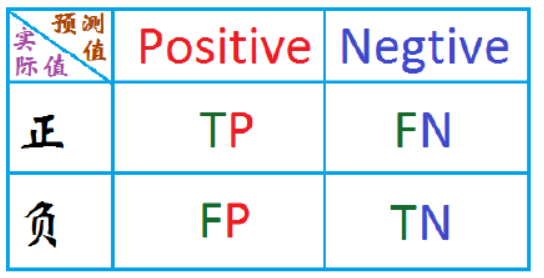

TP—将正类预测为正类数 

FN—将正类预测为负类数 

FP—将负类预测为正类数 

TN—将负类预测为负类数

精确率(查准率):$P=\frac{TP}{TP+FP}$。已知所有预测为正的样本，其中有多少预测准确。

召回率(查全率):$R=\frac{TP}{TP+FN}$。已知所有实际为正的样本，其中有多少预测出来。

$F_1$值:精确率和召回率的调和平均,$\frac{2}{F_1}=\frac{1}{P}+\frac{1}{R}$

$F_1=2\frac{PR}{P+R}$,

$F_\beta=(1+\beta^2)\frac{PR}{\beta^2P+R}$,

$F_2$:召回率的权重高于精确率,$F_{0.5}$:精确率的权重高于召回率。

Micro-F1:所有类别统一计算,F1公式不变，关键是P,R计算的差异，

$P=\frac{\sum^m_{i=1}TP_i}{\sum^m_{i=1}TP_i+\sum^m_{i=1}FP_i}$，$R=\frac{\sum^m_{i=1}TP_i}{\sum^m_{i=1}TP_i+\sum^m_{i=1}FN_i}$

Macro-F1:分别计算各类的F1并计算均值 $P=\frac{1}{m}\sum^m_{i=1}p_i$,$R=\frac{1}{m}\sum^m_{i=1}r_i$,m表示类别数目

P-R曲线:根据不同阈值产生不同P,R画出来的曲线，横坐标为查全率，纵坐标为查准率

比较性能：取P=R的点，看大小


## ROC 和AUC

ROC:以$TPR=\frac{TP}{TP+FN}$为横坐标，以$FPR=\frac{FP}{FP+TN}$为纵坐标，画出的曲线。

(0,1):FN = 0, FP = 0, 表示所有样本都正确分类

(1,0):TN = 0, TP = 0, 表示所有样本都分类错误

(0,0):FP = 0, TP = 0, 表示所有样本都分类为负

(1,1):TN = 0, FN = 0, 表示左右样本都分类为正

显然越靠近右上角，效果越好

如何绘制？数据(类别，判断为正类的概率)按$P_{正}$从高到底排列，每次选取一个不同的threshold，$p_{正}\ge threshold$时为正样本，否则为负样本,得到一组FPR和TPR，即ROC曲线上的一点。训练最极限的状态就是所有的正样本都在负样本前面。

过程：

1.起点(0,0),n=0

2.下一个点以排序后第一个样本的概率值为阈值，计算正类数k,负类数p;n=n+1

3.前一个点坐标为(x,y),当前类为正，新坐标更新为$(x,y+\frac{1}{k})$,否则更新为$(x+\frac{1}{p},y)$

4.如果n=样本数，停止，否则回到2

AUC:ROC曲线下的面积，$0.5\le AUC \le1$

当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变

# 逻辑回归的优点和缺点

优点：

计算简单，速度快，适合分布式，在线计算，资源占用小；

可解释性强，可以清晰查看各个特征的权重；

模型效果不错，可以作为baseline使用；

新数据输入，模型调整能力强；

噪声鲁棒性好；

缺点：

适用场景有限，不能解决非线性问题，样本不均衡问题

准确率不高，无法应用到复杂数据

不能进行特征选择

# 样本不均衡问题的解决方法

参考：https://blog.csdn.net/hustchenze/article/details/83008357
https://blog.csdn.net/zhongjunlang/article/details/79568601
https://www.researchgate.net/publication/322266652_Handling_Imbalanced_Data_A_Survey
https://blog.csdn.net/jemila/article/details/77992967

## 数据层面

### 扩充数据集

收集更多缺少的数据，使用GAN扩充数据

### 重采样

过采样：采样的个数大于该类样本的个数

1.SMOTE构造新的小类样本。基于距离计算两个小类的相似性，选择其中一个作基础样本，在邻近样本中随机选取一定数量的样本，对基础样本的某一属性加噪声。Borderline-SMOTE：只为那些周围大部分是大众样本的小众样本生成新样本。

2.聚类后过采样：大类样本聚类，训练L个分类器，每个分类器使用大类中的一个簇与所有的小类样本进行训练得到。投票给出结果


欠采样：移除那些数量多的类别的一部分数据

1.boosting增量模型：递归地训练三个弱学习器，然后将这三个弱学习器结合形成一个强的学习器让L1输出始终为true，L2数据是50%L1预测正确和50%预测错误(这就是小类样本)的，因此L2样本均衡。L3的数据是L2判断为小类的样本.最终投票在L2和L3结果都是小类下，输出类别才是小类

2.bagging模型融合：有放回地取出富有类样本，再和稀有类样本组合成新的训练集。训练N个模型，投票或求均值


## 分类器

1.损失函数增加小类样本的权值，降低大类样本的权值

2.特征选择：选择具有显著区分能力的特征进行训练

3.One-class分类：只需检测某一特定类别，把小类样本作为异常点

4.minibatch过程每个batch内保证类别平衡，均匀数据训练，不均匀数据在最后一层finetune

## 指标

P,R,F1,ROC曲线,使用交叉验证

## 小结

在正负样本都很少的时候，采取SMOTE构造新的小类样本；

相差悬殊采用One-class分类，增量，融合


# sklearn 参数详解

## class sklearn.linear_model.LogisticRegression

class sklearn.linear_model.LogisticRegression（penalty ='l2'，dual = False，tol = 0.0001，C = 1.0，fit_intercept = True，intercept_scaling = 1，class_weight = None，random_state = None，solver ='warn'，max_iter = 100，multi_class ='warn '，verbose = 0，warm_start = False，n_jobs =None）

它可以处理密集和稀疏输入。使用包含64位浮点数的C有序数组或CSR矩阵以获得最佳性能; 

penalty：正则项，默认'l2'

dual:当n_samples> n_features时，dual = False；默认False

tol:计算精度，回归停止的基准，默认1e-4

C:正浮点数，越小表示正则化强度越高默认值1.0

fit_intercept:决策函数是否包含截距，默认True

intercept_scaling:默认值为1 仅求解器为liblinear且self.fit_intercept设置为True时有用。

class_weight:dict或'balanced'，默认无，所有类别权重相同。

random_state:随机数种子

求解器:{'newton-cg'，'lbfgs'，'liblinear'，'sag'，'saga'}，默认：'liblinear'。

max_iter:最大迭代次数。默认100

multi_class:{'ovr'，'multinomial'，'auto'}，默认ovr。ovr表示二进制问题适合每个标签。multinomial使用交叉熵损失。solver='liblinear'时，'multinomial'不可用。如果数据是二进制的，或者如果solver ='liblinear'，'auto'选择'ovr'，否则选择'multinomial'。

verbose:默认0；对于liblinear和lbfgs求解器，将详细设置为任何正数以表示详细程度。

warm_start默认False.热启动，重用上次参数进行初始化

n_jobs:int或None，可选（默认=无），并行任务使用的cpu数量

## decision_function(X)#预测样本的置信分数

参数：x形如(样本数，特征数)的矩阵

返回值：每个(样本，类别)组合的置信分数。二分类下，self.classes_[1]> 0，预测结果则为该类。

## densify()#将系数矩阵转换为密集阵列

coef转换为numpy.ndarray，这是训练使用的coef的默认格式，只有已经稀疏化的模型才能调用此方法

## fit(X, y, sample_weight=None)

用于训练模型，返回值：实例

X:形如[样本数，特征数]的训练数据

y:形如[样本数，标签数]的训练标签

样本权重：每个样本有独立的权重，默认为1

## get_param(deep=True)

获取当前模型及子项目的参数

deep布尔值：True,返回参数

返回值：参数名到对应值的映射字符串

## predict(X)

X:形如[样本数，特征数]的数据
    
返回预测类别

## predict_log_proba(X)

预测概率值取log

X:形如[样本数，特征数]的数据

返回值T:根据标签排序，返回所有类别预测概率值的log值,形如[样本数，类别数]

## predict_proba(X)

预测概率值

对于多分类问题，使用softmax方程计算每一类别的预测概率值；使用one-vs-rest方法时，使用逻辑方程将每个类别的概率值都设为大于0，再集合所有类别归一化。
X:形如[样本数，特征数]的数据

返回值T:根据标签排序，返回所有类别预测概率值,形如[样本数，类别数]

## score(X, y, sample_weight=None)

对于多标签分类问题，子集准确率使用哈希尺度，要求每个样本的各个类别都能正确预测

X:形如[样本数，特征数]的测试数据
    
y:形如[样本数，标签数]的数据的真实值
    
样本权重：每个样本有独立的权重

返回平均准确率

## set_params(** params)

设置参数

返回实例

## sparsify()

将系数矩阵转换为稀疏格式

将coef_成员转换为scipy.sparse矩阵。对于L1正则化模型，它可以比通常的numpy.ndarray表示更高的内存和存储效率。intercept_成员不会被转换。

对于非稀疏模型，这实际上可能会增加内存使用量。零元素数量必须超过50％才能提供显著的效益

调用此方法后，要进一步调用densify后，partial_fit才生效